In [15]:

directory_in_str =  r"../../back up tifs/20240417"
directory_out_strimg =  directory_in_str+r"./images/"
directory_out_strlbl =  directory_in_str+r"./labels/"


inpaths = glob.glob(directory_in_str+"/*.tif")
inpaths

['../../back up tifs/20240417/20240417_P4.tif',
 '../../back up tifs/20240417/20240417_P5.tif',
 '../../back up tifs/20240417/20240417_P7.tif',
 '../../back up tifs/20240417/20240417_P6.tif',
 '../../back up tifs/20240417/20240417_P2.tif',
 '../../back up tifs/20240417/20240417_P3.tif',
 '../../back up tifs/20240417/20240417_P1.tif',
 '../../back up tifs/20240417/20240417_P8.tif',
 '../../back up tifs/20240417/20240417_P9.tif']

In [9]:
ls ../../back\ up\ tifs/20240417

20240417_P1.tif  20240417_P4.tif  20240417_P7.tif
20240417_P2.tif  20240417_P5.tif  20240417_P8.tif
20240417_P3.tif  20240417_P6.tif  20240417_P9.tif


In [4]:
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
import os
import glob
from skimage import io, exposure, img_as_ubyte

# mac
directory_in_str =  r"./finder-camera4_3"
directory_out_strimg =  r"./finder-camera4_3/images/"
directory_out_strlbl =  r"./finder-camera4_3/labels/"

# lionel
# dataset = "20240418"
dataset = "20240425"

directory_in_str = "E:/Scott/Data/"+dataset
directory_out_strimg =  directory_in_str+r"/images"
directory_out_strlbl =  directory_in_str+r"/labels"

os.makedirs(directory_out_strimg, exist_ok = True)
os.makedirs(directory_out_strlbl, exist_ok = True)


inpaths = glob.glob(directory_in_str+"/*.tif")
percentile = 0.01
percentile_threshold = 100 - percentile  # 100 - 0.3
# directory = os.fsencode(directory_in_str)

print(inpaths)
for file in inpaths:
#     filename = os.fsdecode(file)
    print(file)
    data = io.imread(file)
    print(data.shape)
    for i, timepoint_data in enumerate(data):

        timepoint = str(i+1)
        if (i+1) < 100:
            timepoint = "0"+timepoint
        if (i+1) < 10:
            timepoint = "0"+timepoint
        
        threshold_value = np.percentile(timepoint_data, percentile_threshold)


        outfile = file.replace(".tif", "_t"+timepoint+".png").replace(directory_in_str, directory_out_strimg)
        outfiletxt = outfile.replace(".png", ".txt").replace("images", "labels")
        

        timepoint_data_normalized = np.where(timepoint_data > threshold_value, threshold_value, timepoint_data)

        
        timepoint_data_normalized2 = (timepoint_data_normalized - timepoint_data_normalized.min()) / (
            timepoint_data_normalized.max() - timepoint_data_normalized.min())


        img_normalized2 = Image.fromarray((timepoint_data_normalized2 * 255).astype(np.uint8))  # Convert to 8-bit

        img_normalized2.save(outfile, format="PNG", compress_level=0, bits=16)

        with open(outfiletxt, 'w') as creating_new_csv_file: 
               pass 


['E:/Scott/Data/20240425\\20240425_MAX_P1.tif', 'E:/Scott/Data/20240425\\20240425_MAX_P2.tif', 'E:/Scott/Data/20240425\\20240425_MAX_P3.tif', 'E:/Scott/Data/20240425\\20240425_MAX_P4.tif', 'E:/Scott/Data/20240425\\20240425_MAX_P5.tif', 'E:/Scott/Data/20240425\\20240425_MAX_P6.tif', 'E:/Scott/Data/20240425\\20240425_MAX_P7.tif', 'E:/Scott/Data/20240425\\20240425_MAX_P8.tif']
E:/Scott/Data/20240425\20240425_MAX_P1.tif
(124, 1200, 1920)
E:/Scott/Data/20240425\20240425_MAX_P2.tif
(124, 1200, 1920)
E:/Scott/Data/20240425\20240425_MAX_P3.tif
(124, 1200, 1920)
E:/Scott/Data/20240425\20240425_MAX_P4.tif
(124, 1200, 1920)
E:/Scott/Data/20240425\20240425_MAX_P5.tif
(124, 1200, 1920)
E:/Scott/Data/20240425\20240425_MAX_P6.tif
(124, 1200, 1920)
E:/Scott/Data/20240425\20240425_MAX_P7.tif
(124, 1200, 1920)
E:/Scott/Data/20240425\20240425_MAX_P8.tif
(124, 1200, 1920)


['./maximages\\B1P1.tif',
 './maximages\\B1P2.tif',
 './maximages\\B1P3.tif',
 './maximages\\B1P4.tif',
 './maximages\\B1P5.tif',
 './maximages\\B1P6.tif',
 './maximages\\B1P7.tif',
 './maximages\\B1P8.tif',
 './maximages\\B2S1C1P1BF.tif',
 './maximages\\B2S1C3 P11BF.tif',
 './maximages\\B2S1C3P2BF.tif',
 './maximages\\B2S1C3P4BF.tif',
 './maximages\\B2S1C3P5BF.tif',
 './maximages\\B2S1C3P7BF.tif',
 './maximages\\B2S2C3P1BF.tif',
 './maximages\\B2S2C3P4BF.tif']

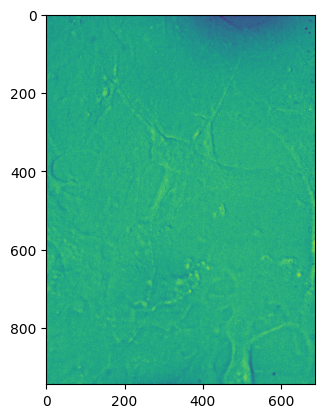

In [21]:
from PIL import Image
import matplotlib.pyplot as plt
plt.imshow(io.imread(r'./maximages\B1P1.tif')[0])